# Introduction to Scikit-Lean (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful SciKit-Learn library.

What we're going to cover:

In [37]:
# let's listify the content
what_were_covering = [
"0. An end-to-end SckiKit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorith and use it to make predictions on our data",
"4. Evaluating a model",
"5. improve a model",
"6. save and load a trained model",
"7. putting it all together!",
]

In [38]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end SciKit-Learn workflow

In [12]:
# 1. Get the data ready

heart_disease = pd.read_csv("./data/heart-disease.csv");
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]


In [6]:
# 2 Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
clf.fit(x_train, y_train);

In [14]:
# make a prediction
y_label = clf.predict(np.array[0,2,3,4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [15]:
y_preds = clf.predict(x_test)

In [16]:
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [17]:
y_test

231    0
279    0
273    0
63     1
135    1
      ..
54     1
166    0
151    1
255    0
235    0
Name: target, Length: 61, dtype: int64

In [18]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [19]:
clf.score(x_test, y_test)

0.8032786885245902

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        29
           1       0.75      0.94      0.83        32

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



In [24]:
confusion_matrix(y_test, y_preds)

array([[19, 10],
       [ 2, 30]])

In [25]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [30]:
# 5. Improve a model
# try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97

Trying model with 20 estimators...
Model accuracy on test set: 85.25

Trying model with 30 estimators...
Model accuracy on test set: 85.25

Trying model with 40 estimators...
Model accuracy on test set: 83.61

Trying model with 50 estimators...
Model accuracy on test set: 85.25

Trying model with 60 estimators...
Model accuracy on test set: 85.25

Trying model with 70 estimators...
Model accuracy on test set: 85.25

Trying model with 80 estimators...
Model accuracy on test set: 83.61

Trying model with 90 estimators...
Model accuracy on test set: 85.25



In [31]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [35]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

## 1. Getting our data ready to be used with machine learning
Three main things we have to do:
* 1. Split the data into features and labels (usually "x" & "y")
  2. Filling (also called imputing) or disregarding missing values
  3. converting non-numerical values to numerical values (also called feature encoding)

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# prepare the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [43]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [47]:
x.shape

(303, 13)

## 1.1 Make sure it's all numerical

In [51]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
len(car_sales)

1000

In [52]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [55]:
# split into x/y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [57]:
# split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [58]:
x_train

,Make,Colour,Odometer (KM),Doors
245,Honda,Blue,26616,4
710,Nissan,White,177272,4
462,Toyota,Black,58773,4
738,Nissan,Blue,96785,4
694,Toyota,Blue,177356,4
...,...,...,...,...
740,BMW,Black,11049,3
965,Honda,Blue,168261,4
876,Honda,White,124924,4
314,Nissan,Blue,104355,4


In [60]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [63]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [64]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [67]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [69]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (aka imputation).
2. Remove the samples with missing data altogether.

In [104]:
# import car sales missing data
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [105]:
# Create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [106]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

### Option 1: Fill missing data with Pandas

In [107]:
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [112]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [116]:
# Fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(round(car_sales_missing["Odometer (KM)"].mean(), 1))

# Fill the "Doors" column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [120]:
# check dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [123]:
# Remove rows with missing price value
car_sales_missing = car_sales_missing.dropna()

In [124]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [126]:
len(car_sales_missing)

950

In [128]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [130]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

### Option 2: Fill missing values with SciKit-Learn

In [135]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [136]:
# Drop rows with no price
car_sales_missing = car_sales_missing.dropna(subset=["Price"])

In [139]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [140]:
# Split into x & y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [143]:
# Fill missing values with SciKit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [144]:
car_sales_filled = pd.DataFrame(
    filled_x, 
    columns=["Make", "Colour", "Doors", "Odometer (KM)"]
)
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [145]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [146]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [150]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    transformed_x,
    y,
    test_size=0.2
)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

## 2. Choosing the righr estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see "clf" (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem using Sklearn and not sure what model to use, refer to the sklearn machine learning map:
https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem
Let's use the California housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [157]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [163]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [168]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [170]:
# Ridge Regression Model

# import algorithm/estimator
from sklearn.linear_model import Ridge
# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate an fit model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# score the model
model.score(x_test, y_test)

0.5758549611440125

In [174]:
# Lasso Model

# import algorithm/estimator
from sklearn.linear_model import Lasso

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit a model
model = Lasso()
model.fit(x_train, y_train)

# score model
model.score(x_test, y_test)

0.2841671821008396

### Ensemble model
An ensemble is a combination of smaller models to try and make better predictions than just a single model
Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [177]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# score the model
model.score(x_test, y_test)

0.806652667101436

### 2.2 Picking a machine learning model for a classification problem

In [180]:
# import wine dataset
from sklearn.datasets import load_wine
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [183]:
wine_df = pd.DataFrame(data["data"], columns=data["feature_names"])
wine_df["target"] = data["target"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [192]:
# import LinearSVC model
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# create the data
x = wine_df.drop("target", axis=1)
y = wine_df["target"]

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create the model
model = LinearSVC()
model.fit(x_train, y_train)

# score the model
model.score(x_test, y_test)

1.0

In [185]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create the model
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8688524590163934

In [194]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create the model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:

    * 1. If you have structured data, use ensemble methods (tables)
    * 2. If you have unstructured data, use deep learning or transfer learning (images, audio, text)

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
X = features, features variables, data
y = labels, targets, target variables

In [196]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training the machine learning model)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. "predict()"
2. "predict_proba()"

In [197]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [198]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [199]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [203]:
#  predict_proba() return probabilities of a classfification label

In [205]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [206]:
# Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models.

In [207]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [208]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# score the model
model.score(X_test, y_test)

0.806652667101436

In [216]:
# Make predictions
y_preds = model.predict(X_test)
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [218]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [219]:
np.mean(y_preds == y_test)

np.float64(0.0)

In [221]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

## 4. Evaluating a machine learning model

Three ways to evaluate SciKit-Learn models/estimators:
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric function

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score()` method

In [224]:
# Classifier algorithm

# import model
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#score the model
clf.score(x_test, y_test)


0.8524590163934426

In [229]:
# Regressor algorithm

# import the model
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# score the model
model.score(X_test, y_test)

0.806652667101436

### 4.2 Evaluating a model using `scoring` parameter

In [231]:
from sklearn.model_selection import cross_val_score

# import model
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [232]:
clf.score(X_test, y_test)

0.8524590163934426

In [233]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [237]:
# compare single score and cross val score
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [ ]:
# default scoring parameter of classifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. confusion matrix
4. classification report

**Accuracy**

In [240]:
# import classifier model 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

## score the model
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [244]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.83%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [253]:
# create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [251]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

In [254]:
y_probs[:10], len(y_probs)

(array([[0.1 , 0.9 ],
        [0.75, 0.25],
        [0.31, 0.69],
        [0.69, 0.31],
        [0.19, 0.81],
        [0.21, 0.79],
        [0.87, 0.13],
        [0.65, 0.35],
        [0.47, 0.53],
        [0.24, 0.76]]),
 61)

In [255]:
y_probs_positive = y_probs[:, 1]

In [256]:
y_probs_positive

array([0.9 , 0.25, 0.69, 0.31, 0.81, 0.79, 0.13, 0.35, 0.53, 0.76, 0.3 ,
       0.77, 0.97, 0.24, 0.61, 0.97, 0.97, 0.63, 0.17, 0.93, 0.53, 0.22,
       0.03, 0.5 , 0.49, 0.1 , 0.99, 0.76, 0.57, 0.57, 0.02, 0.92, 0.59,
       0.38, 0.59, 1.  , 0.03, 0.89, 0.51, 0.12, 0.68, 0.22, 0.62, 0.51,
       0.13, 0.01, 0.59, 0.96, 0.41, 0.77, 0.21, 0.7 , 0.84, 0.86, 0.77,
       0.71, 0.73, 0.62, 0.05, 0.16, 0.23])

In [258]:
# calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rate
fpr

array([0.        , 0.03571429, 0.03571429, 0.07142857, 0.14285714,
       0.14285714, 0.17857143, 0.17857143, 0.25      , 0.28571429,
       0.35714286, 0.46428571, 0.46428571, 0.5       , 0.53571429,
       0.60714286, 0.60714286, 0.67857143, 0.71428571, 0.75      ,
       0.75      , 0.78571429, 0.78571429, 0.82142857, 0.82142857,
       0.85714286, 0.85714286, 0.85714286, 0.89285714, 0.89285714,
       0.92857143, 0.92857143, 0.96428571, 1.        , 1.        ])

In [268]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # plot the roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot line with no predicitve power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

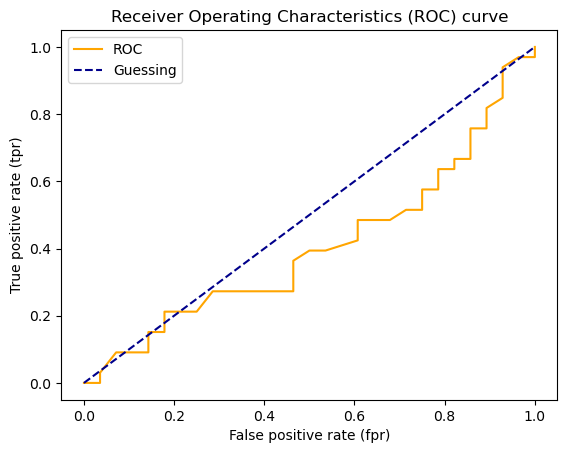

In [269]:
plot_roc_curve(fpr, tpr)

In [270]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.40692640692640697

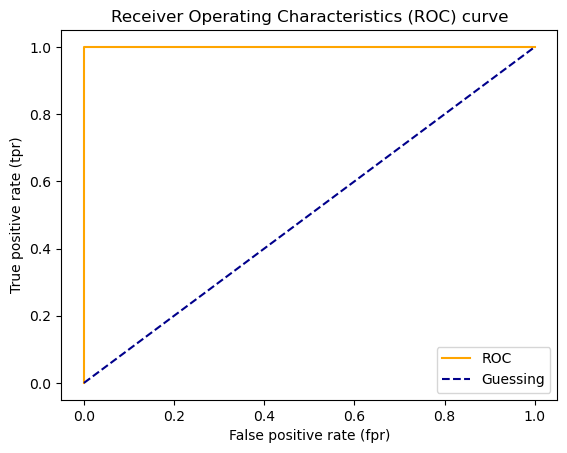

In [271]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [272]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you  an idea of where the model is getting confused.

SciKit documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [280]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 5, 28]])

In [284]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual Labels"],
    colnames=["Predict Labels"]
)

Predict Labels,0,1
Actual Labels,,
0,21,7
1,5,28


In [ ]:
# install seaborn to conda environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn 

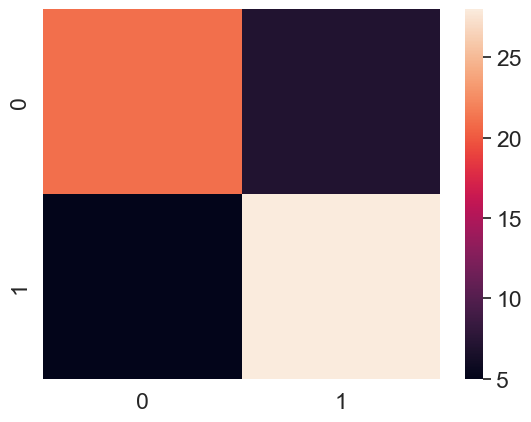

In [300]:
# OLD VERSION
# make confusion matrix more visual with seaborn's heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with SkiKit-Learn you will need sklearn version 1.0+

In [305]:
# check sklearn version
sklearn.__version__

'1.7.1'

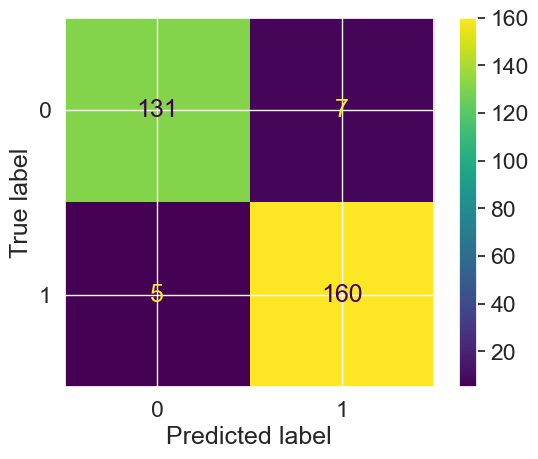

In [311]:
# confusion matrix from estimator (without predictions)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y);

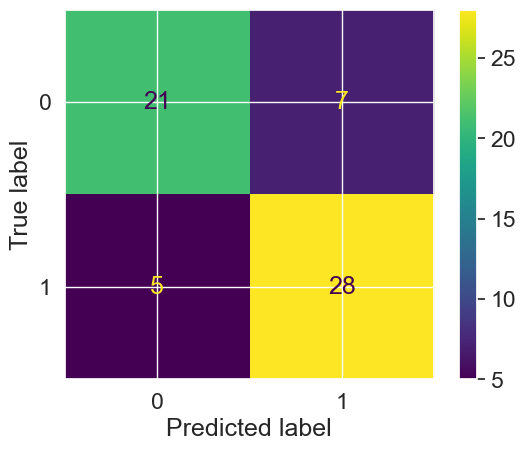

In [312]:
# confusion matrix from estimator (without predictions)
from sklearn.metrics import ConfusionMatrixDisplay

y_preds = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);